# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_data_df = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
mouse_study_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
count_mice = mouse_study_data_df['Mouse ID'].nunique()
count_mice

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_df = mouse_study_data_df.groupby(["Mouse ID", "Timepoint"]).size().reset_index(name='size') # Creates a dataframe with Mouse ID, Timepoint, and how many times it appears in the larger dataset
duplicate_mice_df
duplicate_mice_greater_1_df = duplicate_mice_df[duplicate_mice_df['size'] > 1] # Shows where a Mouse ID Timepoint combo comes up more than once
duplicate_mice_greater_1_df

,Mouse ID,Timepoint,size
586,g989,0,2
587,g989,5,2
588,g989,10,2
589,g989,15,2
590,g989,20,2


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_mouse_id = "g989"

clean_mice_study_data_df = mouse_study_data_df[mouse_study_data_df['Mouse ID'] != duplicate_mouse_id]
clean_mice_study_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
count_mice = clean_mice_study_data_df['Mouse ID'].nunique()
count_mice

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_volume = clean_mice_study_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_tumor_volume = clean_mice_study_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance_tumor_volume = clean_mice_study_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_tumor_volume = clean_mice_study_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_tumor_volume = clean_mice_study_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
tumor_volume_df = pd.DataFrame(
    {"Mean": mean_tumor_volume,
     "Median": median_tumor_volume,
     "Variance": variance_tumor_volume,
     "STD": std_tumor_volume,
     "SEM": sem_tumor_volume,
     })

# Display results
tumor_volume_df

,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

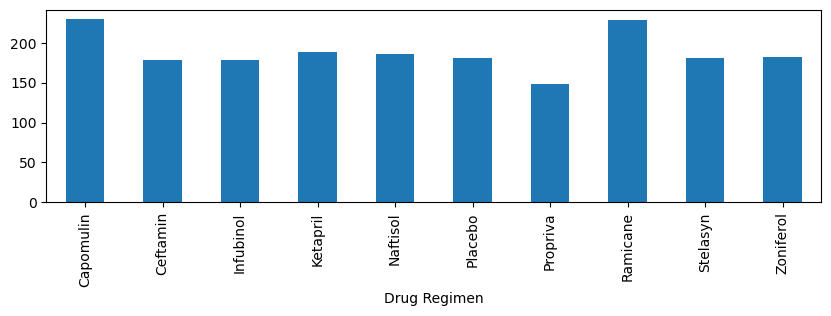

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Create table
drug_regimen_and_observations = clean_mice_study_data_df.groupby('Drug Regimen')['Mouse ID'].count()
drug_regimen_and_observations

# Create graph
drug_regimen_and_observations.plot(kind="bar", figsize=(10,2.5))

# Set a title for the chart
# plt.xlabel("Drug Regimen")
# plt.ylabel("Observations")
# plt.title("Total Number of Observations for each Drug Regimen")

# Show graph
plt.show()

<BarContainer object of 10 artists>

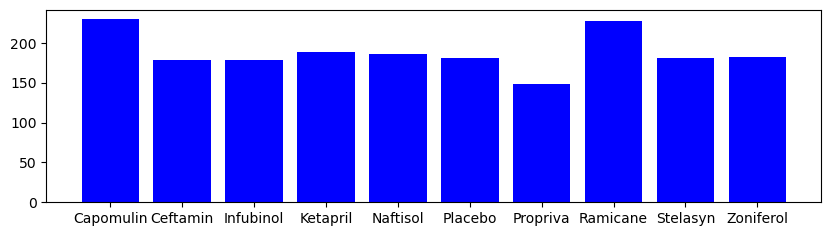

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Create dataframe
drug_regimen_and_observations = clean_mice_study_data_df.groupby('Drug Regimen')['Mouse ID'].count()
drug_regimen_and_observations
drug_regimen_and_observations_count_df = pd.DataFrame({"Count": drug_regimen_and_observations})
drug_regimen_and_observations_count_df

# Create bar graph
plt.figure(figsize=(10, 2.5))
plt.bar(drug_regimen_and_observations_count_df.index, drug_regimen_and_observations_count_df['Count'], color='b')

# Set a title for the chart
# plt.xlabel("Drug Regimen")
# plt.ylabel("Observations")
# plt.title("Total Number of Observations for each Drug Regimen")

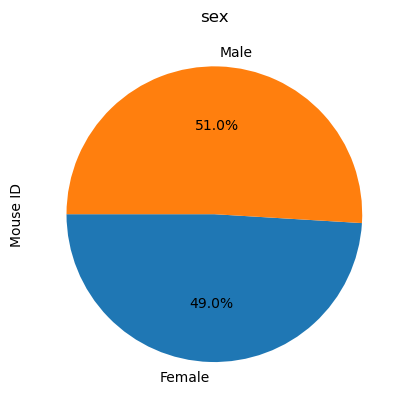

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_vs_female = clean_mice_study_data_df.groupby('Sex')['Mouse ID'].count()
male_vs_female

# Create chart
male_vs_female.plot(kind="pie", startangle=180, autopct='%1.1f%%', title="sex")
# plt.ylabel("")
plt.show()

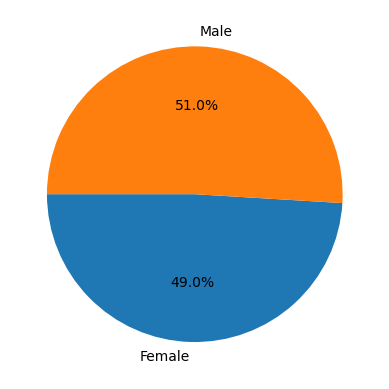

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male_vs_female = clean_mice_study_data_df.groupby('Sex')['Mouse ID'].count()
male_vs_female
male_vs_female_count_df = pd.DataFrame({"Count": male_vs_female})
male_vs_female_count_df

# Create pie chart
plt.pie(male_vs_female, startangle=180, autopct='%1.1f%%', labels = male_vs_female_count_df.index)
# plt.title("sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = clean_mice_study_data_df.groupby('Mouse ID')['Timepoint'].max()
greatest_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume_final_timepoint_df = pd.merge(greatest_timepoint, clean_mice_study_data_df, on=['Mouse ID', 'Timepoint'], how='inner')
tumor_volume_final_timepoint_df
tumor_volume_final_timepoint_df = tumor_volume_final_timepoint_df.rename(columns = {'Timepoint': 'Final Timepoint'})
tumor_volume_final_timepoint_df

,Mouse ID,Final Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [33]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor volume data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # Loc looks for the treatment in the Drug Regimen column and volume in Tumor Volumn (mm3) column
    treatment_data = tumor_volume_final_timepoint_df.loc[tumor_volume_final_timepoint_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add the volume to the tumor volume list (for plotting) 
    tumor_volume_data.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

# Print list
print(tumor_volume_data)

[3      62.999356
21     45.000000
22     56.057749
25     55.742829
58     48.722078
75     47.784682
88     61.849023
94     68.923185
106    67.748662
107    57.918381
109    46.784535
110    59.851956
113    64.299830
134    59.741901
150    61.433892
154    64.192341
184    45.000000
188    52.925348
189    45.000000
209    67.527482
223    45.000000
228    64.634949
231    61.386660
238    68.594745
240    64.729837
Name: Tumor Volume (mm3), dtype: float64, 3      62.999356
21     45.000000
22     56.057749
25     55.742829
58     48.722078
75     47.784682
88     61.849023
94     68.923185
106    67.748662
107    57.918381
109    46.784535
110    59.851956
113    64.299830
134    59.741901
150    61.433892
154    64.192341
184    45.000000
188    52.925348
189    45.000000
209    67.527482
223    45.000000
228    64.634949
231    61.386660
238    68.594745
240    64.729837
Name: Tumor Volume (mm3), dtype: float64, 3      62.999356
21     45.000000
22     56.057749
25     55.7428

{'whiskers': [<matplotlib.lines.Line2D at 0x14b30b520>,
 'caps': [<matplotlib.lines.Line2D at 0x14b30ba60>,
 'boxes': [<matplotlib.lines.Line2D at 0x13e69e0b0>,
 'medians': [<matplotlib.lines.Line2D at 0x14b30bfa0>,
 'fliers': [<matplotlib.lines.Line2D at 0x14b31c280>,
 'means': []}

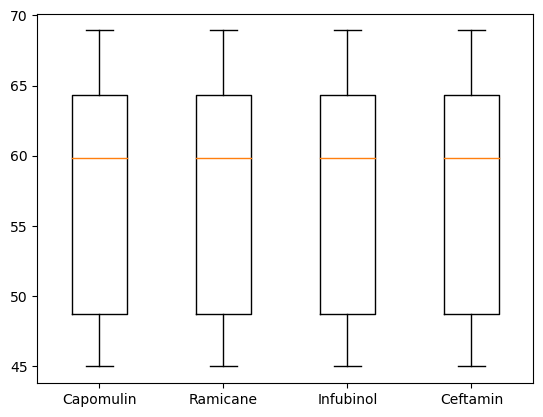

In [35]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume_data, labels=treatments)

## Line and Scatter Plots

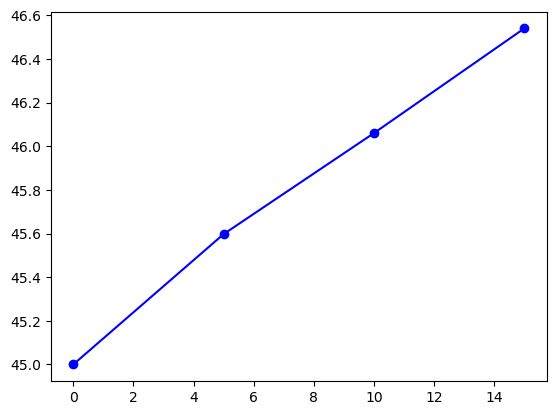

In [23]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin 
# (Used r157 because i509 had no data)
mouse_r157_df = clean_mice_study_data_df[clean_mice_study_data_df["Mouse ID"] == "r157"]
mouse_r157_df
mouse_r157_Capomulin_df = mouse_r157_df[mouse_r157_df["Drug Regimen"] == "Capomulin"]
mouse_r157_Capomulin_df

# Create a line plot for tumor volume vs. time point for the specific mouse and treatment
plt.plot(mouse_r157_Capomulin_df['Timepoint'], mouse_r157_Capomulin_df['Tumor Volume (mm3)'], marker='o', color='b')

# Set plot labels and title
# plt.xlabel('Final Timepoint')
# plt.ylabel('Tumor Volume (mm3)')
# plt.title('Capomulin treatment of mouse R157')

# Show the plot
plt.show()

In [24]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mouse_capomulin_df = clean_mice_study_data_df[clean_mice_study_data_df["Drug Regimen"] == "Capomulin"]
mouse_capomulin_df
groupby_df = mouse_capomulin_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean().reset_index()
groupby_df

#plt.scatter(groupby_df["Weight (g)"], groupby_df["Tumor Volume (mm3)"], marker="o", facecolors="blue")
# plt.xlabel('Weight in grams')
# plt.ylabel('Average Tumor Volume (mm3)')
# plt.show()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344
5,i557,24,44.805810
6,i738,20,39.141053
7,j119,23,44.465236
8,j246,21,43.216925
9,l509,21,44.434474


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


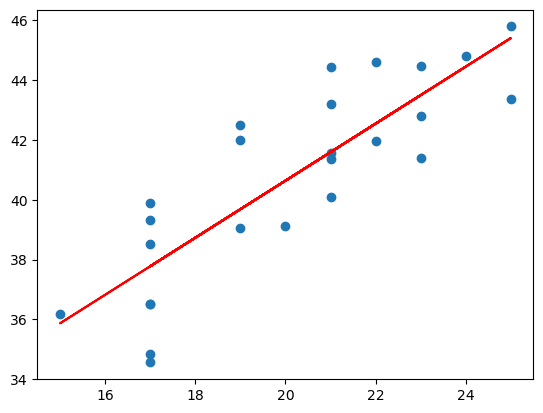

In [25]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# x and y values
x_values = groupby_df['Weight (g)']
y_values = groupby_df['Tumor Volume (mm3)']

# Calculate the slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Calculate and show correlation
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")